# Analysis of drought in Illinois using Standardized Precipitation Index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spi =  pd.read_fwf('https://www.ncei.noaa.gov/monitoring-content/temp-and-precip/drought/nadm/indices/spi/data/01mon-spi-us-stn-lower48.txt',
                header=None)

In [3]:
# Location data for the drought monitoring stations
spiloc = pd.read_fwf('https://www.ncei.noaa.gov/monitoring-content/temp-and-precip/drought/nadm/indices/metadata/us48-stn-metadata.txt',
                header=None)

In [4]:
# Extracting the data of stations available in location file
spi = spi.where(spi[0].isin(spiloc[0])).dropna()
spi = spi.drop(columns=1)

In [5]:
spi.columns = ['station','yr',*['m-'+str(i) for i in range(1,13)]]

In [6]:
spiloc

,0,1,2,3,4
0,USC00010160,32.95,-85.95,AL,ALEXANDER CITY
1,USC00010583,30.88,-87.79,AL,BAY MINETTE
2,USC00010655,34.69,-86.88,AL,BELLE MINA 2 N
3,USC00011620,33.28,-86.34,AL,CHILDERSBURG WTR PL
4,USC00012245,32.52,-87.88,AL,DEMOPOLIS L&D
...,...,...,...,...,...
1810,USW00094910,42.55,-92.40,IA,WATERLOO MUNICIPAL AP
1811,USW00094911,42.88,-97.36,SD,YANKTON 2 E
1812,USW00094931,47.39,-92.84,MN,HIBBING FAA AP
1813,USW00094957,40.08,-95.60,NE,FALLS CITY 2 NE


In [7]:
# Creating lat lon and state list to be added in SPI data
spiloc = spiloc.where(
    spiloc[0].isin(spi['station'])
    ).dropna()

lat=[]
lon=[]
st = []
for i in range(len(spiloc[0])):
    lat.append(
        [spiloc[1].iloc[i]]*len(spi[spi['station']==spiloc[0].iloc[i]])
        )
    lon.append(
        [spiloc[2].iloc[i]]*len(spi[spi['station']==spiloc[0].iloc[i]])
        )
    st.append(
        [spiloc[3].iloc[i]]*len(spi[spi['station']==spiloc[0].iloc[i]])
        )

In [8]:
spi['lat']= sum(lat,[])
spi['lon']=sum(lon,[])
spi['st']=sum(st,[])

In [10]:
# Extracting 42 years (1981-2022) of SPI data for Illinois state
f_il = spi[spi['st']=='IL']
f_il = f_il[f_il['yr'].isin(range(1981,2023))]

In [11]:
f_il

,station,yr,m-1,m-2,m-3,m-4,m-5,m-6,m-7,m-8,m-9,m-10,m-11,m-12,lat,lon,st
8767,USC00110338,1981.0,-2.56,0.23,-1.83,1.20,0.57,1.09,0.20,1.08,0.21,-0.76,-0.27,-0.96,41.78,-88.31,IL
8768,USC00110338,1982.0,1.01,-0.82,1.02,-0.24,-0.09,-0.66,1.01,-0.74,-0.89,-0.16,1.39,2.24,41.78,-88.31,IL
8769,USC00110338,1983.0,-1.36,-0.23,1.08,1.56,0.19,-0.79,1.19,-0.44,0.39,0.07,1.46,0.66,41.78,-88.31,IL
8770,USC00110338,1984.0,-1.33,0.92,0.42,0.23,0.15,0.80,-1.46,-1.99,0.83,-0.25,0.83,0.17,41.78,-88.31,IL
8771,USC00110338,1985.0,0.40,1.00,1.74,-1.21,-0.68,-0.83,-0.16,-0.79,-0.36,0.59,2.35,-0.67,41.78,-88.31,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85199,USW00094846,2018.0,-0.02,2.12,-0.54,-0.39,1.83,1.56,-2.27,0.95,0.38,1.02,0.63,0.89,41.99,-87.93,IL
85200,USW00094846,2019.0,0.37,1.09,-0.21,1.30,1.85,-0.33,0.32,0.08,1.43,1.63,-0.21,-0.32,41.99,-87.93,IL
85201,USW00094846,2020.0,1.01,-0.79,0.85,0.25,2.21,0.33,-0.55,-1.95,0.21,0.58,-0.34,0.44,41.99,-87.93,IL
85202,USW00094846,2021.0,0.36,-0.19,-1.05,-2.09,-1.08,1.27,-1.15,0.38,-0.85,1.34,-2.01,0.28,41.99,-87.93,IL


In [12]:
#List of drought monitoring stations in Illinois
st = list(dict.fromkeys(f_il['station']))

In [13]:
"""
According to SPI user guide, continous period of SPI< -1 is considered as drought condition. In this study we  
define the continuous period of greater than equal to 2 months with SPI < -1 as drought period  
""" 
# Extracting stationswise drought period/months
import more_itertools as mit
drt = []
drtmo=[]
for i in range(len(st)):
    fm = f_il[f_il['station']==st[i]]
    fm = fm.set_index('yr')
    fm = fm[fm.columns[2:14]]
    fmT = fm.T
    drt_st=[]
    mo = []
    for j in fmT.columns:
        ind = list(
            [int(i[2]) for i in fmT[fmT[j]<-1].index]
            )
        grp = [
            list(group) for group in mit.consecutive_groups(ind)
            ]
        mo1=[]
        for k in grp:
            if len(k)>=2:
                drt_st.append(
                    (float(j),st[i])
                    )
                mo1.append(k)
        if(len(mo1)>0):
            mo.append(mo1)
    drtmo.append(mo)
    drt.append(drt_st)


In [14]:
## Extracting data for years with drought conditions for each station and storing stationwise dataframes into list
drt = [np.array(j) for j in drt]
drtyrs = []
for i in range(len(drt)):
    x =  drt[i][:,0].astype(np.float)
    f_drt = f_il[
        (f_il['station'] == drt[i][:,1][1]) & (f_il['yr'].isin(x))
        ]
    drtyrs.append(f_drt)

/tmp/ipykernel_89065/3578553160.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x =  drt[i][:,0].astype(np.float)


In [15]:
# Creating dataframe with drought information for all stations
drought = pd.concat(drtyrs,axis=0)

In [16]:
drought

,station,yr,m-1,m-2,m-3,m-4,m-5,m-6,m-7,m-8,m-9,m-10,m-11,m-12,lat,lon,st
8770,USC00110338,1984.0,-1.33,0.92,0.42,0.23,0.15,0.80,-1.46,-1.99,0.83,-0.25,0.83,0.17,41.78,-88.31,IL
8774,USC00110338,1988.0,-0.03,-0.58,0.17,-0.30,-1.25,-2.24,-0.08,0.40,-0.36,0.32,1.40,0.26,41.78,-88.31,IL
8775,USC00110338,1989.0,-0.81,-0.39,-0.39,-1.95,-1.18,0.09,1.10,-0.33,1.32,-0.95,0.21,-1.74,41.78,-88.31,IL
8777,USC00110338,1991.0,-0.32,-0.95,1.13,0.49,0.85,-2.19,-3.72,-0.93,0.11,1.59,0.60,-0.60,41.78,-88.31,IL
8778,USC00110338,1992.0,-0.79,-0.48,0.40,-0.21,-2.58,-1.16,0.39,-0.38,1.59,-0.80,1.99,0.74,41.78,-88.31,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85170,USW00094846,1989.0,-0.92,-0.79,-0.61,-1.42,-1.25,-0.95,1.19,1.11,0.47,-0.68,0.01,-1.91,41.99,-87.93,IL
85172,USW00094846,1991.0,-0.17,-1.03,0.88,0.35,0.79,-1.76,-1.91,-0.26,-0.07,1.79,0.79,-0.17,41.99,-87.93,IL
85173,USW00094846,1992.0,-0.84,-0.05,0.26,-0.75,-3.12,-1.43,0.23,0.05,0.60,-0.43,1.50,0.41,41.99,-87.93,IL
85186,USW00094846,2005.0,1.74,0.65,-0.80,-1.28,-0.92,-1.93,-1.09,-0.42,-0.00,-0.77,0.10,-0.49,41.99,-87.93,IL


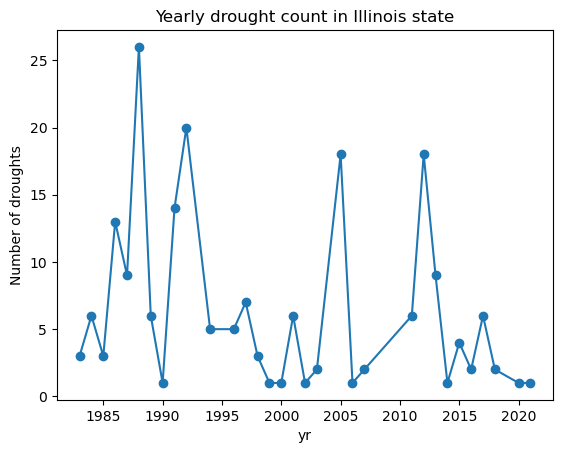

Text(0.5, 1.0, 'Stationwise drought count')

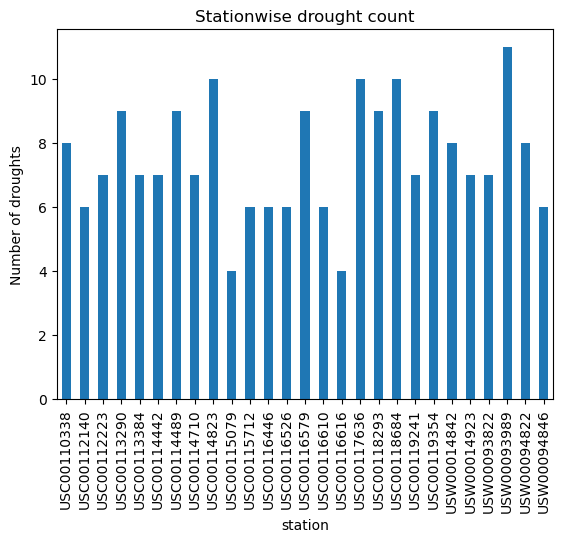

In [102]:
drought['count']=1
drought['count'].groupby(drought['yr']).sum().plot(marker='o')
plt.ylabel('Number of droughts')
plt.title('Yearly drought count in Illinois state')
plt.show()
drought['count'].groupby(drought['station']).sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Number of droughts')
plt.title('Stationwise drought count')

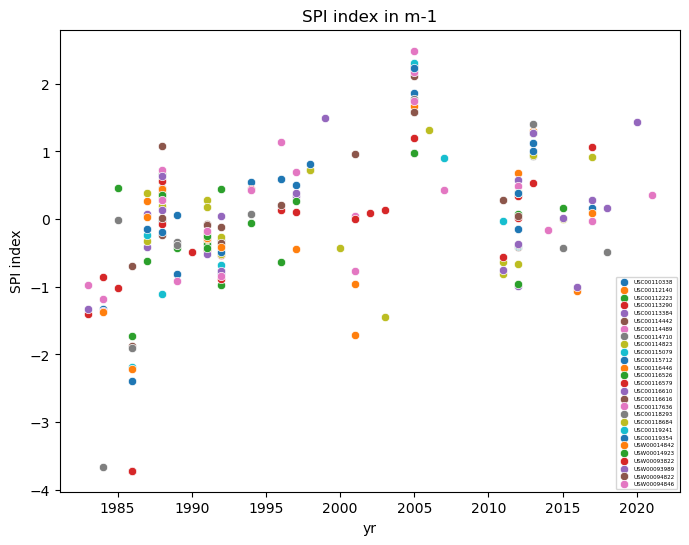

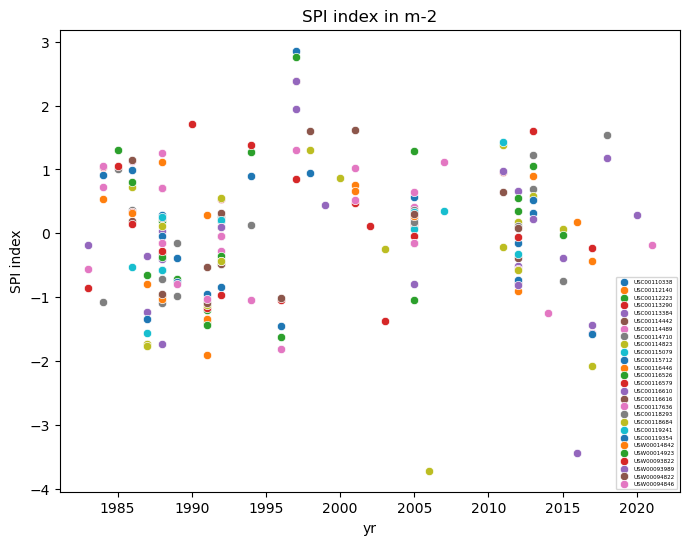

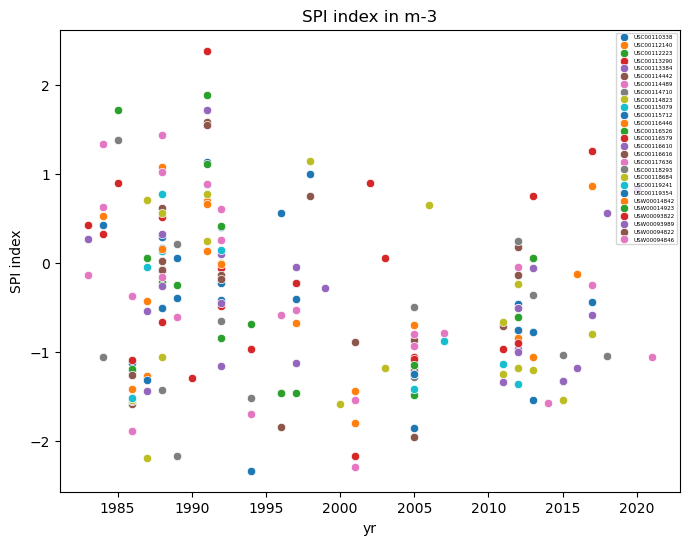

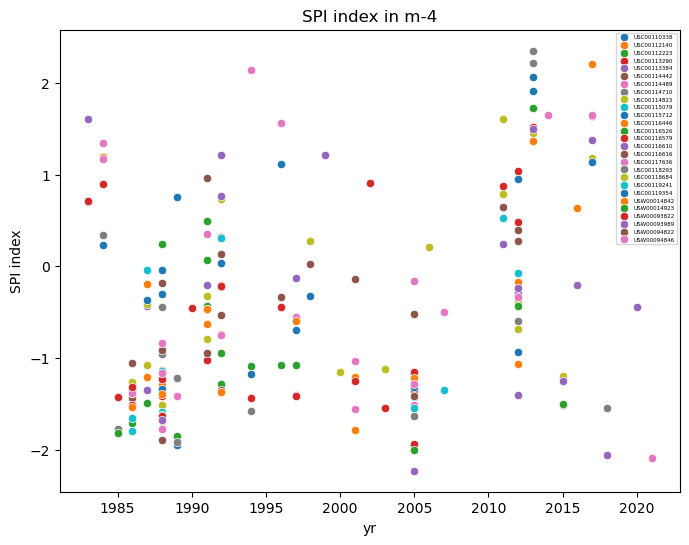

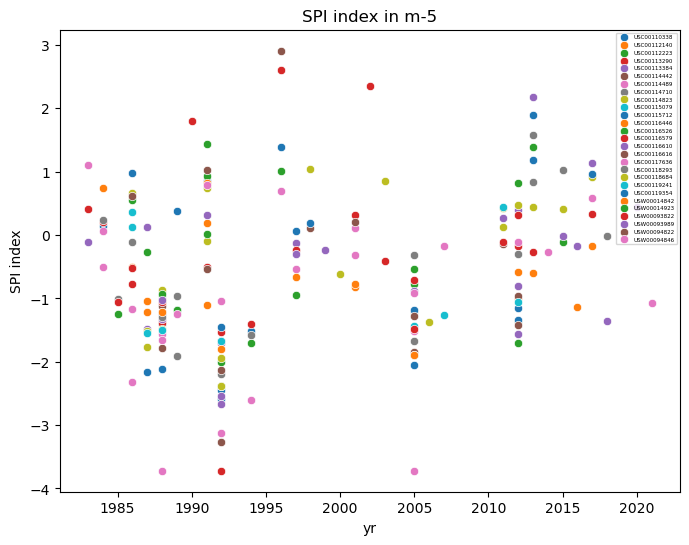

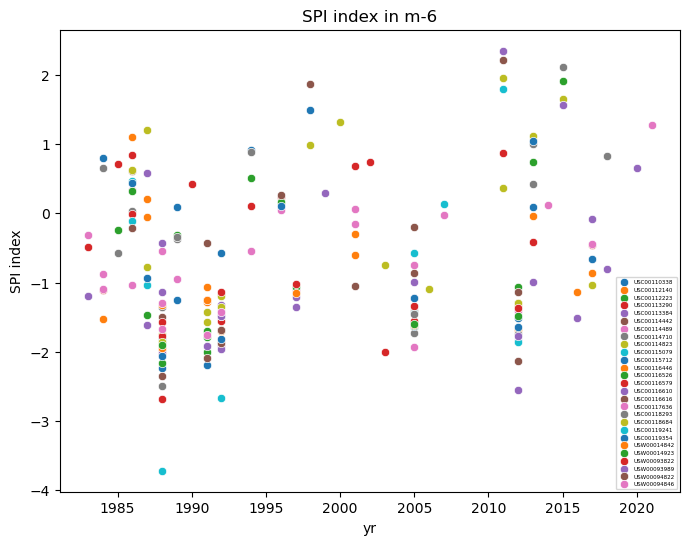

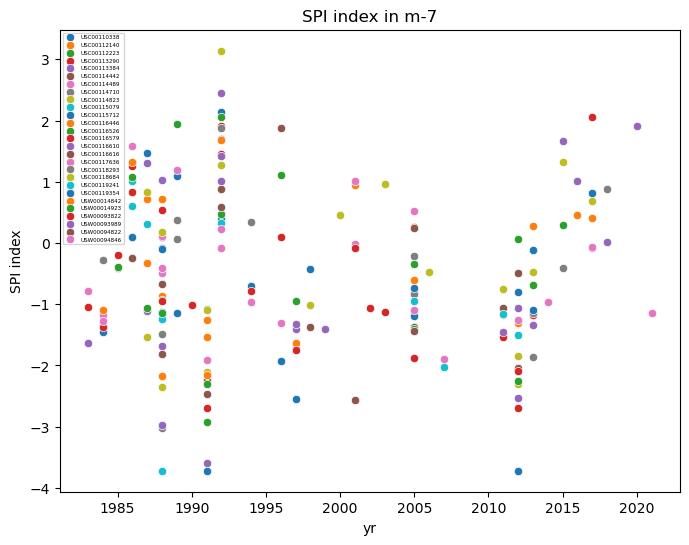

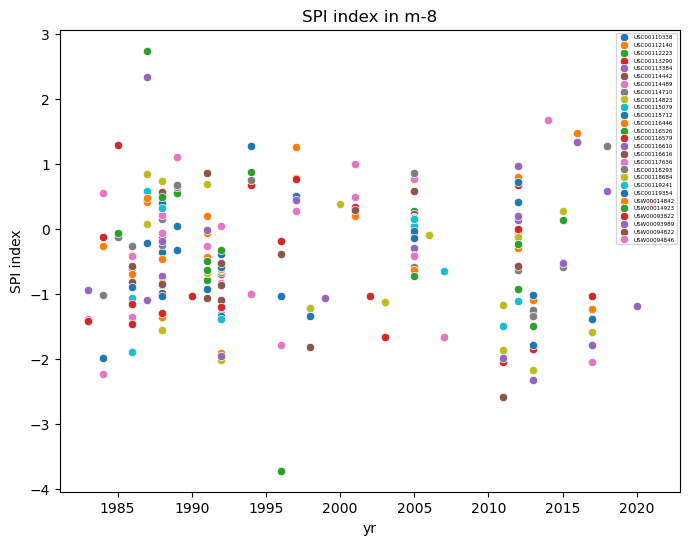

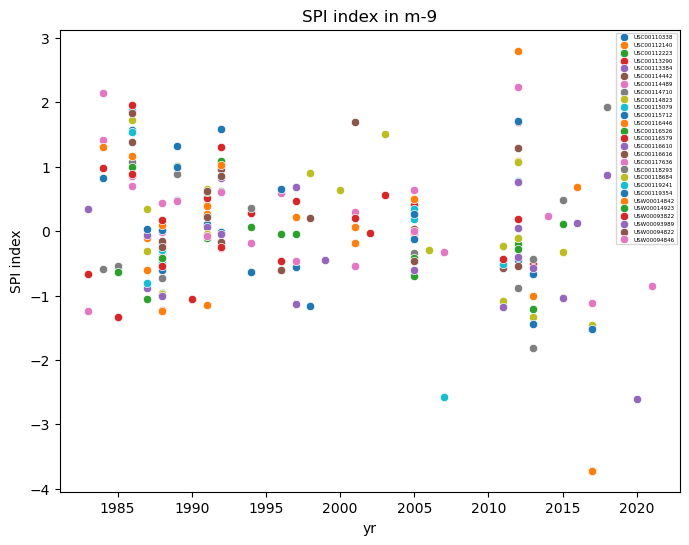

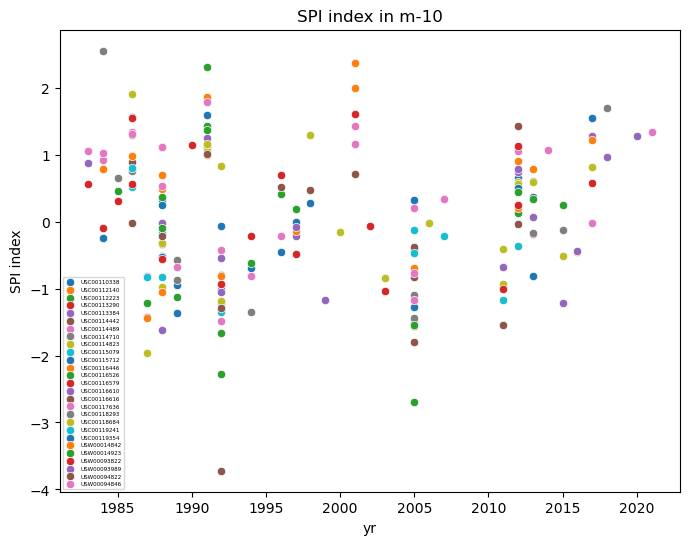

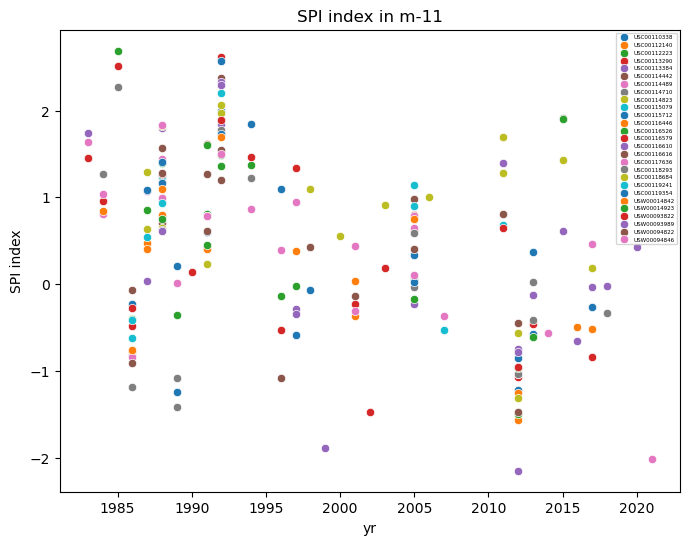

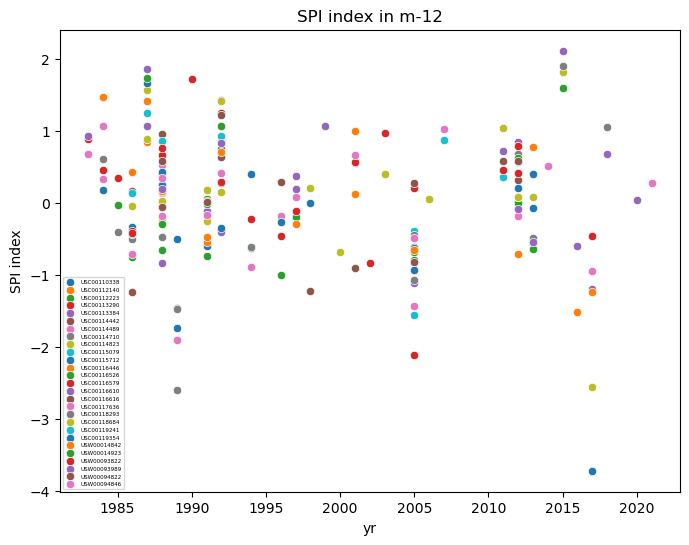

In [110]:
# Plotting SPI of all months in drought years for all stations
import seaborn as sns
from matplotlib.pyplot import figure
for k in drought.columns[2:14]:
    figure(figsize=(8,6))
    for i in st:
        sns.scatterplot(drought[drought['station']==i],x='yr',y=k)
    plt.title('SPI index in '+k)
    plt.legend(st,fontsize = 4)
    plt.ylabel('SPI index')
    plt.show()

In [19]:
# Calculating the magnitude of drought for stations by summing the SPI index of continuous period with SPI < -1 in drought years. 
# Source - https://library.wmo.int/doc_num.php?explnum_id=7768#:~:text=The%20SPI%20calculation%20for%20any,Edwards%20and%20McKee%2C%201997).

drtmag=[]
for i in range(len(drtmo)):
    for k in range(len(drtmo[i])):
        dr = drought[drought['station']==st[i]]
        try:
            mag = dr[['m-'+str(j) for j in drtmo[i][k][0]]].iloc[k].sum()
            drtmag.append(mag)
        except:
            print(i,k)


In [20]:
drought['drtmag'] = drtmag

Text(0.5, 1.0, 'Magnitude of drought in drought years')

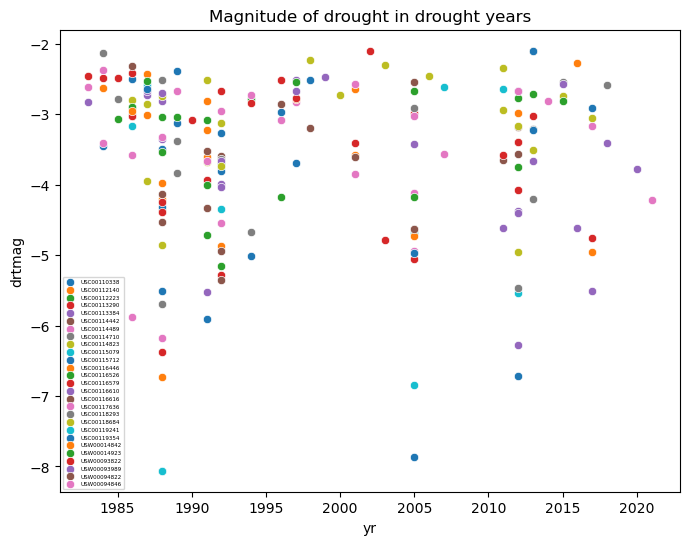

In [114]:
figure(figsize=(8,6))
for i in st:
    sns.scatterplot(
        drought[drought['station']==i],
        x = 'yr',
        y='drtmag'
    )
plt.legend(st,fontsize=4)
plt.title('Magnitude of drought in drought years')

# Analysis of drought with climate indices

In [22]:
import pandas as pd
import xarray as xr
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [23]:
# Storing URLs of ERA5 data for temperature and precipitation
base_url_t = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.an.pl/'
base_url_ppt = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds633.1_nc/e5.moda.fc.sfc.accumu/'
base_url2t = '/e5.moda.an.pl.128_130_t.ll025sc.'
base2ppt1 = '/e5.moda.fc.sfc.accumu.128_142_lsp.ll025sc.'
base2ppt2 = '/e5.moda.fc.sfc.accumu.128_143_cp.ll025sc.'
base_url3 = '.nc'

# period of interest
pr = pd.date_range(
    start='1981-01',end='2021-12', freq='AS'
    )

from datetime import timedelta
from dateutil. relativedelta import relativedelta
file_list_t=[]
file_list_lsp = []
file_list_cp = []
for dt in pr:
    # get recent year and month
    year = dt.strftime('%Y') 
    month = dt.strftime('%Y%m%d%H')
    month2 = (dt+ pd.DateOffset(months=11)).strftime('%Y%m%d%H')

    # build complete file name
    single_filet =(
        base_url_t 
        + year 
        + base_url2t 
        + month 
        +'_'
        + month2 
        +base_url3)

    file_list_t.append(
        single_filet
        )
    file_lsp = (
        base_url_ppt
        +year
        +base2ppt1 
        +month 
        +'_'
        + month2 
        +base_url3)

    file_list_lsp.append(
        file_lsp
        )
    file_cp = (
        base_url_ppt
        +year
        +base2ppt2 
        + month 
        +'_'
        + month2 
        +base_url3
        )
    file_list_cp.append(
        file_cp
        )

In [25]:
#Loading precipitation datasets
lsp = xr.open_mfdataset(
    file_list_lsp, parallel = True).sel(latitude = slice(44,36),
    longitude = slice(268,273)
    )
cp = xr.open_mfdataset(
    file_list_cp, parallel = True).sel(latitude = slice(44,36),
    longitude = slice(268,273)
    )

In [26]:
#Loading temperature datasets
templist= [
    xr.open_dataset(i).sel(level=850.0).sel(latitude = slice(44,36),
    longitude = slice(268,273)) 
    for i in file_list_t
    ] 
temp1 = xr.concat(
    templist,dim='time'
    )

In [27]:
temp1=temp1['T']

In [28]:
ppt = lsp['LSP']+cp['CP']

In [29]:
#Loading soil moisture dataset
import netCDF4
moist = xr.open_dataset(
    'http://psl.noaa.gov/thredds/dodsC/Datasets/cpcsoil/soilw.mon.mean.v2.nc'
    ).sel(lat = slice(44,36),
    lon = slice(268,273)
    )
moist = moist['soilw']

In [30]:
# Extracting climate indices data for drought months
m1 = (sum(drtmo,[]))
m2 = [
    m1[i][0] 
    if len(m1[i])==1 
    else m1[i][1] 
    for i in range(len(m1))
    ]

In [32]:
pptdf=[]
tempdf=[]
soildf=[]
a=-1
for i in drought.index:
    a=a+1
    months = m2[a]
    ppt1 = ppt[
        (ppt.time.dt.year==drought['yr'][i])&
        (ppt.time.dt.month.isin(months))
        ].sum('time')

    temp2 = temp1[
        (temp1.time.dt.year==drought['yr'][i])&
        (temp1.time.dt.month.isin(months))
        ].mean('time')

    moist1 = moist[
        (moist.time.dt.year==drought['yr'][i])&
        (moist.time.dt.month.isin(months))
        ].mean('time')

    p = ppt1.sel(
        latitude=drought['lat'][i],
        longitude=360-drought['lon'][i],
        method='nearest'
        )
    t = temp2.sel(
        latitude=drought['lat'][i],
        longitude=360-drought['lon'][i],
        method='nearest'
        )
    s = moist1.sel(
        lat=drought['lat'][i],
        lon=360-drought['lon'][i],
        method='nearest'
        )
    pptdf.append(p)
    tempdf.append(t)
    soildf.append(s)


In [33]:
pptdf1=[i.values for i in pptdf]
soildf1 = [j.values for j in soildf]

In [34]:
tempdf1 = [i.values for i in tempdf]

Text(0.5, 1.0, 'Soil moisture variation with precipitation in drought period')

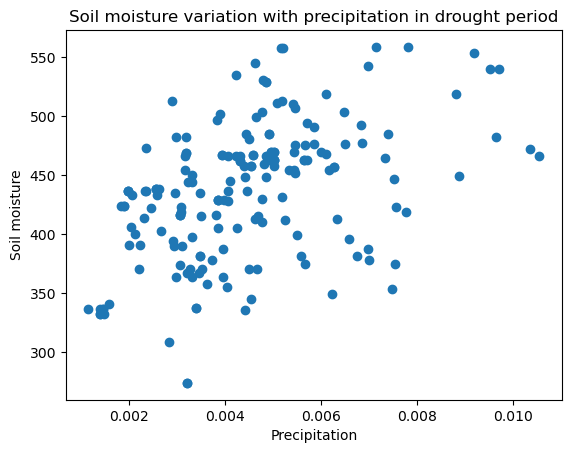

In [116]:
plt.scatter(pptdf1,soildf1)
plt.xlabel('Precipitation')
plt.ylabel('Soil moisture')
plt.title('Soil moisture variation with precipitation in drought period')

In [36]:
drought['Mean temp. of drought months'] = [float(i) for i in tempdf1]
drought['Total ppt. in drought months'] = [float(i) for i in pptdf1]
drought['Mean soil moist. in drought months'] = [float(i) for i in soildf1]

In [37]:
enso = pd.read_csv(
    'https://www.esrl.noaa.gov/psd/data/correlation/censo.data',
    delim_whitespace=True,header=None,skiprows=1,skipfooter=2, engine='python'
    )
pdo = pd.read_csv(
    'https://www.esrl.noaa.gov/psd/data/correlation/pdo.data',
    delim_whitespace=True,header=None,skiprows=1,skipfooter=14, engine='python'
    )
nao = pd.read_csv(
    'https://www.esrl.noaa.gov/psd/data/correlation/nao.data',
    delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python'
    )
ao = pd.read_csv(
    'https://www.esrl.noaa.gov/psd/data/correlation/ao.data',
    delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python'
    )


In [38]:
nao_new=pd.DataFrame()
pdo_new=pd.DataFrame()
ao_new=pd.DataFrame()
enso_new=pd.DataFrame()

enso_new['Date']=pd.date_range(start=pd.datetime(1948,1,1),
                                end=pd.datetime(2022,12,1),freq="MS")
nao_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),
                                end=pd.datetime(2022,12,1),freq="MS")
pdo_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),
                                end=pd.datetime(2022,12,1),freq="MS")
ao_new['Date'] = pd.date_range(start=pd.datetime(1950,1,1),
                                end=pd.datetime(2022,12,1),freq="MS")

enso_new = enso_new.set_index('Date')
nao_new = nao_new.set_index('Date')
pdo_new = pdo_new.set_index('Date')
ao_new = ao_new.set_index('Date')

enso_new['ENSO']=enso.loc[:,1:].stack().values
nao_new['NAO']=nao.loc[:,1:].stack().values
pdo_new['PDO']=pdo.loc[:,1:].stack().values
ao_new['AO']=ao.loc[:,1:].stack().values

/tmp/ipykernel_89065/85840312.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  enso_new['Date']=pd.date_range(start=pd.datetime(1948,1,1),
/tmp/ipykernel_89065/85840312.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end=pd.datetime(2022,12,1),freq="MS")
/tmp/ipykernel_89065/85840312.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  nao_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),
/tmp/ipykernel_89065/85840312.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end=pd.datetime(2022,12,1),freq="MS")
/tmp/ipykernel_89065/85840312.py:10: FutureWarning: The pandas.datetime

In [39]:
import numpy as np
newdf_all = pd.merge(enso_new,pdo_new, 
                    left_index=True, right_index=True)
newdf_all['PDO'][newdf_all['PDO'] <= -9.9] = np.nan
newdf_all['ENSO'][newdf_all['ENSO'] <= -9.9] = np.nan

newdf_all = pd.merge(newdf_all,nao_new, 
                    left_index=True, right_index=True)
newdf_all['NAO'][newdf_all['NAO'] <= -99.9] = np.nan

newdf_all = pd.merge(newdf_all,ao_new, 
                    left_index=True, right_index=True)
newdf_all['AO'][newdf_all['AO'] <= -99.9] = np.nan

In [398]:
newdf_all

,ENSO,PDO,NAO,AO
Date,,,,
1950-01-01,-0.74,-2.13,0.56,-0.060
1950-02-01,-1.70,-2.91,0.01,0.627
1950-03-01,-1.43,-1.13,-0.78,-0.008
1950-04-01,-1.29,-1.20,0.65,0.555
1950-05-01,-1.22,-2.23,-0.50,0.072
...,...,...,...,...
2022-08-01,-1.52,NaN,1.76,-0.180
2022-09-01,-1.87,NaN,-1.42,-0.661
2022-10-01,-1.78,NaN,-0.27,1.352


In [42]:
# Means climate indices for the drought period
b=-1
enso=[]
pdo=[]
nao=[]
ao=[]
clim=pd.DataFrame()
for i in drought.index:
    b=b+1
    months =m2[b]
    clim = clim.append(
        newdf_all[(newdf_all.index.year==drought['yr'][i]) & (newdf_all.index.month.isin(months))].mean(),
        ignore_index=True
        )

/tmp/ipykernel_89065/3650591384.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clim = clim.append(


In [43]:
clim.index = drought.index
drought = drought.join(clim)

In [44]:
drought

,station,yr,m-1,m-2,m-3,m-4,m-5,m-6,m-7,m-8,...,st,count,drtmag,Mean temp. of drought months,Total ppt. in drought months,Mean soil moist. in drought months,ENSO,PDO,NAO,AO
8770,USC00110338,1984.0,-1.33,0.92,0.42,0.23,0.15,0.80,-1.46,-1.99,...,IL,1,-3.45,287.425201,0.003497,415.087463,-0.255000,-0.105000,0.655,0.242500
8774,USC00110338,1988.0,-0.03,-0.58,0.17,-0.30,-1.25,-2.24,-0.08,0.40,...,IL,1,-3.49,285.171753,0.001838,424.169708,-1.205000,0.970000,0.915,-0.392500
8775,USC00110338,1989.0,-0.81,-0.39,-0.39,-1.95,-1.18,0.09,1.10,-0.33,...,IL,1,-3.13,277.318115,0.004983,462.139404,-1.460000,0.075000,0.745,0.319500
8777,USC00110338,1991.0,-0.32,-0.95,1.13,0.49,0.85,-2.19,-3.72,-0.93,...,IL,1,-5.91,288.193481,0.002640,438.382202,0.825000,-0.785000,-0.490,-0.151500
8778,USC00110338,1992.0,-0.79,-0.48,0.40,-0.21,-2.58,-1.16,0.39,-0.38,...,IL,1,-3.74,282.380798,0.002329,436.264862,1.185000,1.400000,1.500,0.519500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85170,USW00094846,1989.0,-0.92,-0.79,-0.61,-1.42,-1.25,-0.95,1.19,1.11,...,IL,1,-2.67,277.124756,0.004319,462.139404,-1.460000,0.075000,0.745,0.319500
85172,USW00094846,1991.0,-0.17,-1.03,0.88,0.35,0.79,-1.76,-1.91,-0.26,...,IL,1,-3.67,288.102661,0.002563,438.382202,0.825000,-0.785000,-0.490,-0.151500
85173,USW00094846,1992.0,-0.84,-0.05,0.26,-0.75,-3.12,-1.43,0.23,0.05,...,IL,1,-4.55,282.288025,0.001980,436.264862,1.185000,1.400000,1.500,0.519500
85186,USW00094846,2005.0,1.74,0.65,-0.80,-1.28,-0.92,-1.93,-1.09,-0.42,...,IL,1,-3.02,288.538818,0.003204,273.817108,0.370000,0.915000,-0.110,-0.206500


In [59]:
# Feature engineering and model fitting to predict drought magnitude

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
import math
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi

model = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median')),
    ('RF',RandomForestRegressor())]
)

R^2 = 0.5725309237903933
RMSE= 1.0052156678851412


Text(0, 0.5, 'predicted output')

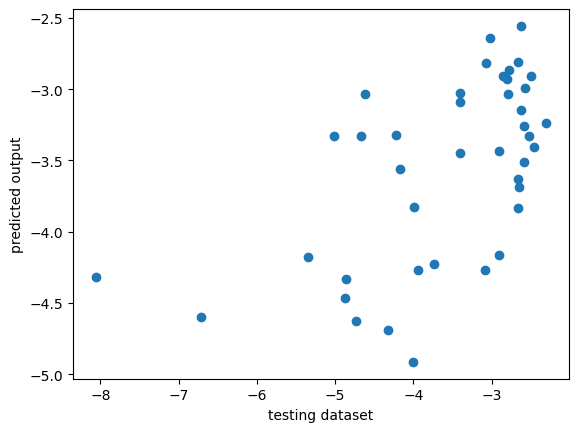

In [120]:


X_train1, X_test1, y_train1, y_test1 = train_test_split(drought[drought.columns[-7:]],
                                                        drought['drtmag'],test_size=0.2, 
                                                        random_state=0)
model.fit(X_train1, y_train1)

# let's get the predictions
X_test_preds1 = model.predict(X_test1)

print('R^2 =', 
        pearsonr(y_test1,X_test_preds1)[0])
print('RMSE=',
        math.sqrt(sklearn.metrics.mean_squared_error(X_test_preds1,y_test1)))
plt.scatter(y_test1, X_test_preds1);
plt.xlabel('testing dataset')
plt.ylabel('predicted output')

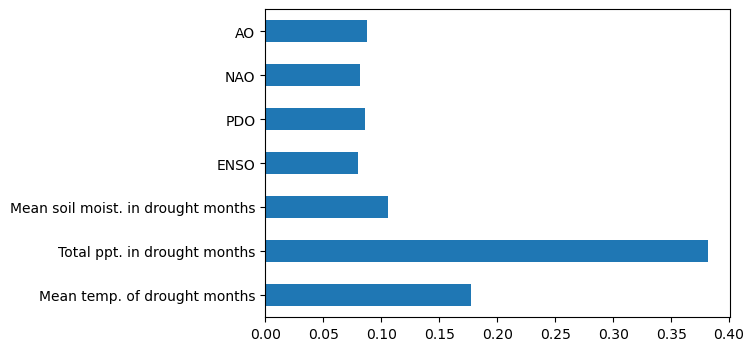

In [67]:
importance = pd.Series(model.named_steps['RF'].feature_importances_)
importance.index = drought.columns[-7:]
# importance.sort_values(inplace=True, ascending=False)
importance.plot.barh(figsize=(6,4))
plt.show()

In [70]:
# Lowest drought magnitude in each station and lowest rainfall - To check if there's relation between two
minmag = drought['drtmag'].groupby(drought['station']).min()
minrain = drought['Total ppt. in drought months'].groupby(drought['station']).min()
latlon = drought[['lat','lon']].groupby(drought['station']).max()

In [71]:
minmag= pd.DataFrame(minmag).join([minrain,latlon])

/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


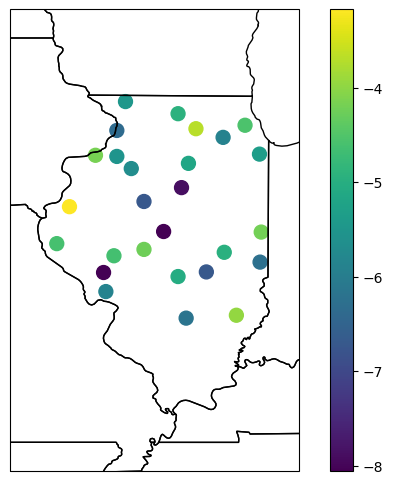

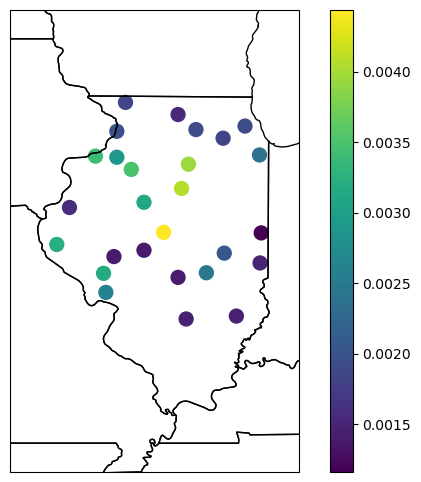

In [72]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8,6))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.set_extent(
    [-92, -87, 36, 44],
    crs=crs.PlateCarree()
)
# modify the plot by adding a scatterplot over the map
plt.scatter(
    x=minmag["lon"],
    y=minmag["lat"],
    c=minmag['drtmag'],
    cmap='viridis',
    s=100,
    alpha=1,
    transform=crs.PlateCarree()
)
plt.colorbar()
plt.show()

figure = plt.figure(figsize=(8,6))
ax1 = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.STATES)
ax1.set_extent(
    [-92, -87, 36, 44],
    crs=crs.PlateCarree())
plt.scatter(
    x=minmag["lon"],
    y=minmag["lat"],
    c=minmag['Total ppt. in drought months'],
    cmap='viridis',
    s=100,
    alpha=1,
    transform=crs.PlateCarree()
)
plt.colorbar()
plt.show()

#### There doesn't seem to be a consensus between lowest magnitudes of drought and precipitation across the stations

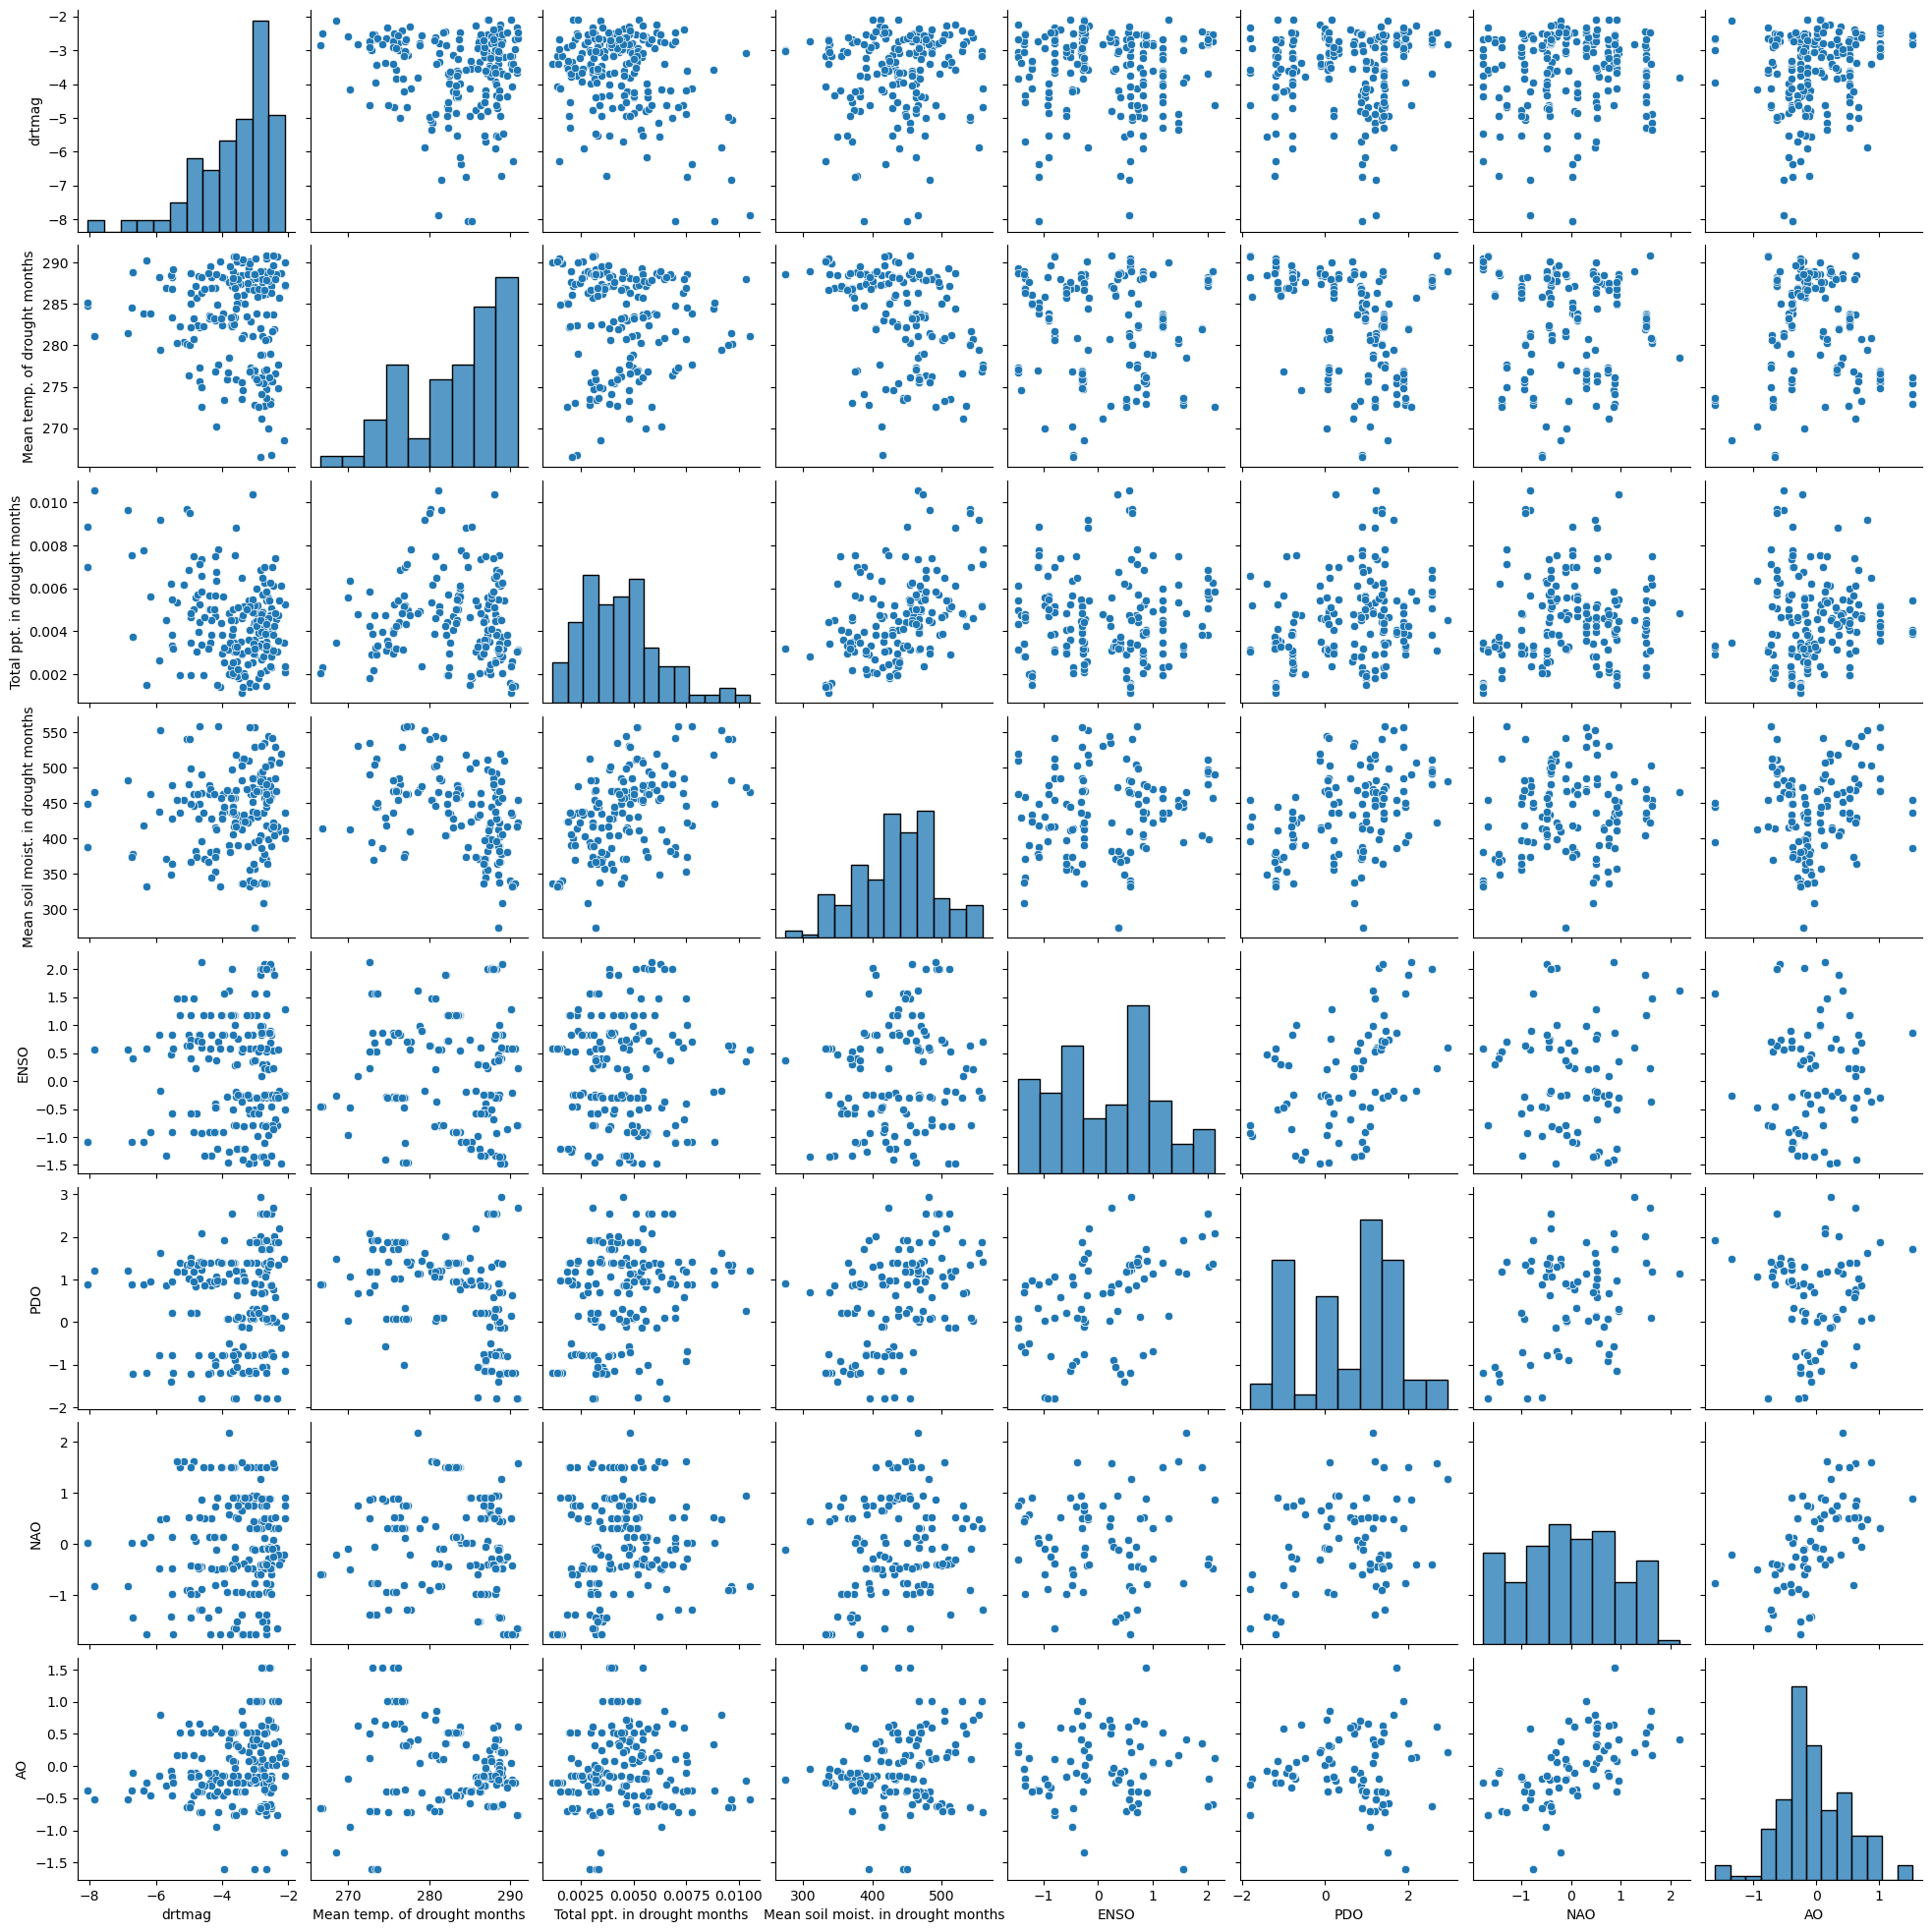

In [118]:
sns.pairplot(drought[drought.columns[-8:]])

In [73]:
#One hot encoding on drought months
onehot = drought[drought.columns[2:14]].where(drought[drought.columns[2:14]]<-1,0)
onehot1 = onehot.where(onehot==0, 1)
onehot1.columns = ['month'+str(i) for i in range(1,13)]

In [74]:
drought1 = drought.join(onehot1)

In [75]:
drought1 = drought1.dropna()

R^2 after one hot encoding= 0.641465554308053
RMSE= 0.9521163472966597


Text(0, 0.5, 'predicted output')

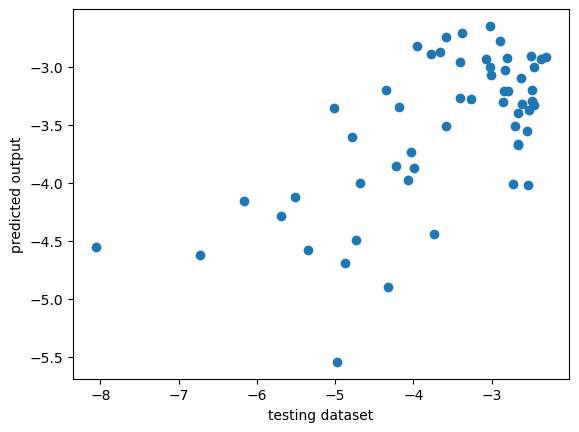

In [82]:
#Model fitting including onehot encoded data

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        drought1.drop(
                columns=drought1.columns[:19],
                axis=1
        ),
        drought1['drtmag'],
        test_size=0.3, 
        random_state=0
)

model2=RandomForestRegressor()
model2.fit(X_train1, y_train1)

# let's get the predictions
X_test_preds1 = model2.predict(X_test1)

print('R^2 after one hot encoding=', 
        pearsonr(y_test1,X_test_preds1)[0])
print('RMSE=',
        math.sqrt(
                sklearn.metrics.mean_squared_error(
                        X_test_preds1,y_test1
                        )
                        ))
plt.scatter(y_test1, X_test_preds1);
plt.xlabel('testing dataset')
plt.ylabel('predicted output')

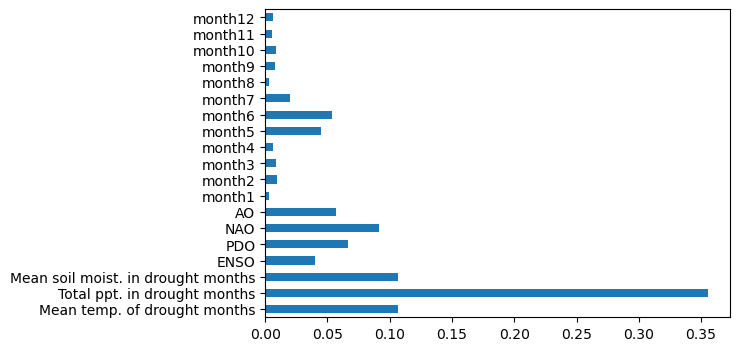

In [83]:
importance = pd.Series(model2.feature_importances_)
importance.index = drought1.columns[19:]
# importance.sort_values(inplace=True, ascending=False)
importance.plot.barh(figsize=(6,4))
plt.show()

###     Feature importance reflects that there is seasonality associated with the drought occurence and months 5,6,7 appear to be most important in context of drought magnitude prediction. Total precipitation appears to be the most important feature for drought prediction. Onehot encoding of months also tends to increase the model accuracy

In [84]:
# Performing EOF analysis on precipitation and soil moisture data to compare EOFs as both seem to be positively correlated
pptanom = ppt.groupby('time.month') - ppt.groupby('time.month').mean(dim='time')
#Detrending
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

# -- Running mean
ppt_dtrend = detrend_dim(pptanom,'time',1)
#Standardize 
clim_mean = ppt_dtrend.groupby('time.month').mean('time')
clim_std = ppt_dtrend.groupby('time.month').std('time')
stdanom = (ppt_dtrend.groupby('time.month')/clim_std).groupby('time.month')-(clim_mean/clim_std)


/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 41 times more chunks
  return self.array[key]
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 41 times more chunks
  return self.array[key]
/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 41 times more chunks
  return self.array[key]


In [85]:
stdanom  = stdanom.chunk({'time':-1})

In [88]:
from eofs.xarray import Eof
coslat = np.cos(np.deg2rad(stdanom.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(stdanom , weights=wgts)

In [91]:
from eofs.xarray import Eof
eof1 = solver.eofsAsCorrelation(neofs=10)

/data/keeling/a/pborse2/miniconda39/envs/geonew/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


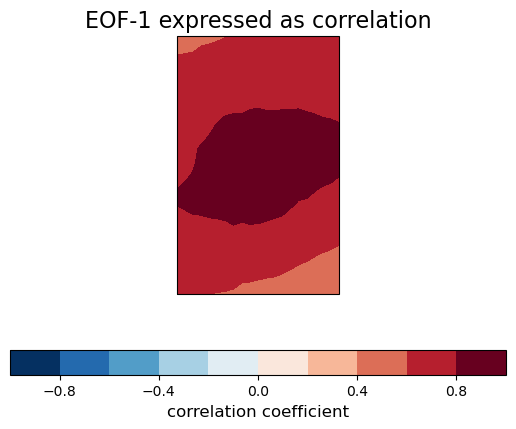

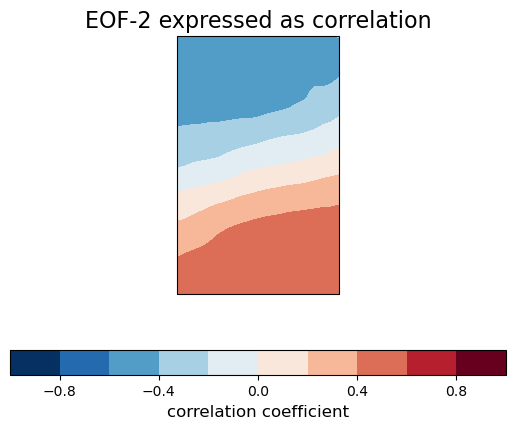

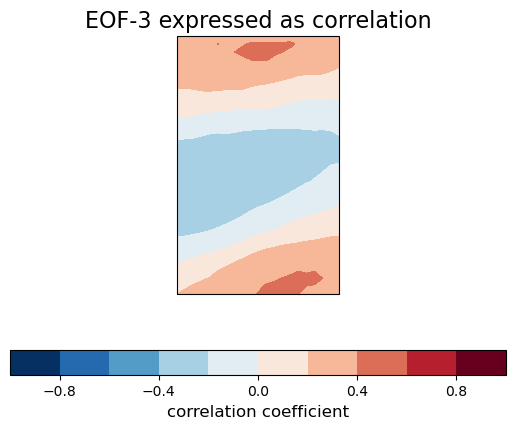

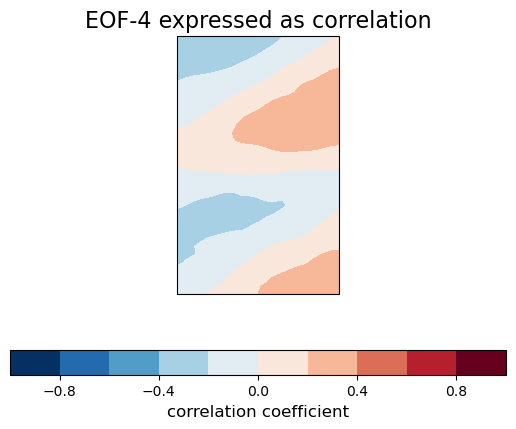

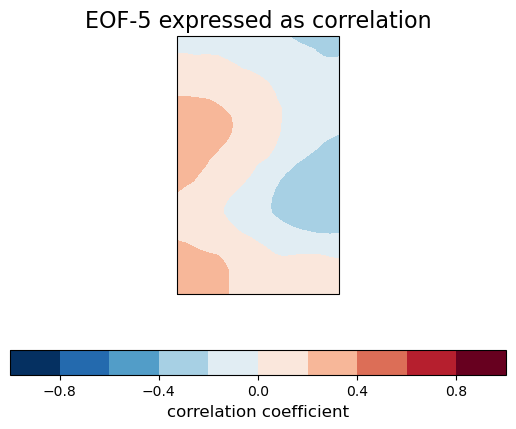

In [92]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
for i in range(len(eof1[:5])):
    clevs = np.linspace(-1, 1, 11)
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
    fill = eof1[i].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                                 add_colorbar=False, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
    cb = plt.colorbar(fill, orientation='horizontal')
    cb.set_label('correlation coefficient', fontsize=12)
    ax.set_title('EOF-'+str(i+1)+ ' expressed as correlation', fontsize=16)
    plt.show()

#### Couldn't perform EOF analysis on soil moisture data as it resulted in dap failure always when tried running the code.

### Important findings from analysis of drought - 
1) Year 1988 experienced highest number (26) of droughts in Illinois State over the period of 40 years
2) Station USW00093989 experienced highest numbet of droughts over the period of 40 years
3) Year 1988 and 2005 experienced severe droughts at few stations with magnitude of around -8
4) Model fitting shows that seasonality also plays role in prediction of drought and precipitation is the most important amongst the climate indices in predicting the drought magnitude